Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 47s 256ms/step - accuracy: 0.3927 - loss: 1.2678 - val_accuracy: 0.4378 - val_loss: 1.8202
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 49s 274ms/step - accuracy: 0.6361 - loss: 0.8672 - val_accuracy: 0.6537 - val_loss: 0.9272
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 50s 281ms/step - accuracy: 0.6919 - loss: 0.7974 - val_accuracy: 0.5690 - val_loss: 1.2254
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 53s 293ms/step - accuracy: 0.7139 - loss: 0.7213 - val_accuracy: 0.4279 - val_loss: 2.0833
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 55s 309ms/step - accuracy: 0.7192 - loss: 0.7011 - val_accuracy: 0.4783 - val_loss: 1.8940
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 55s 308ms/step - accuracy: 0.7593 - loss: 0.6281 - val_accuracy: 0.6339 - val_loss: 1.1391
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 53s 295ms/step - accuracy: 0.7671 - loss: 0.6166 - val_accuracy: 0.6201 - val_loss: 1.1116

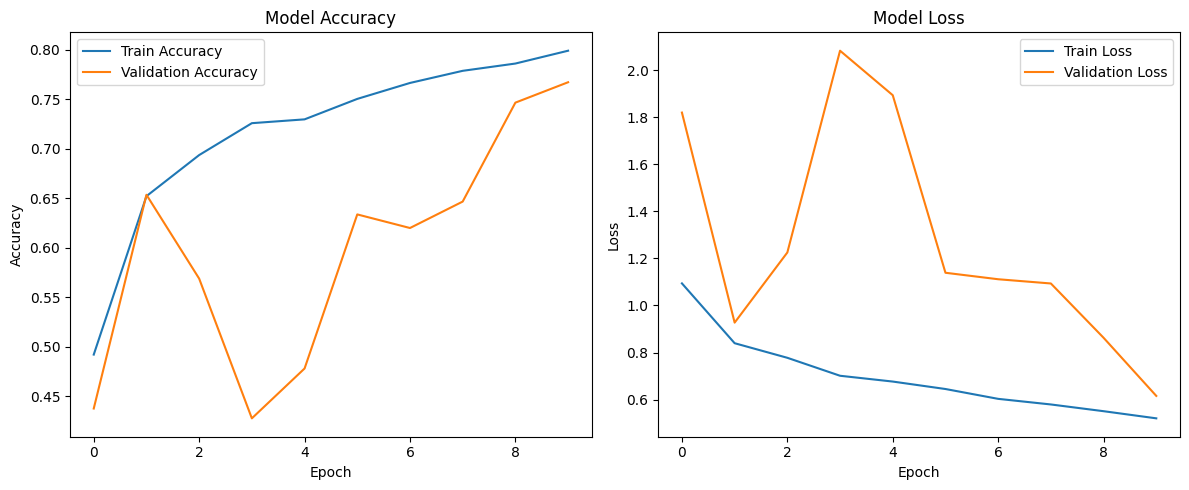

Final Training Accuracy: 79.92%
Final Validation Accuracy: 76.74%


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# === PATH TO YOUR DATASET ===
train_dir = '/Users/soumya/Downloads/archive/Training'
test_dir = '/Users/soumya/Downloads/archive/Testing'

img_size = 150

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical'
)

# Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, epochs=10, validation_data=test_data)
os.makedirs('model', exist_ok=True)
model.save('model/brain_tumor_model.keras')
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
# Print final accuracy
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {train_acc*100:.2f}%")
print(f"Final Validation Accuracy: {val_acc*100:.2f}%")

In [ ]:
# Training





In [ ]:
# Save model

